In [1]:
import glob
import xarray as xr
import netCDF4
import h5netcdf
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
file_paths = glob.glob('/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-0[1-3]-*') 
file_paths

['/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-01-10800.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-03-61200.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-02-14400.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-01-68400.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-02-21600.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-03-68400.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-03-32400.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-01-21600.nc',
 '/glade/derecho/scratch/geraint/archive/NilsFSAdapt/ice/hist/NilsFSAdapt.cice.h2_01h.0001-01-01-64800.nc',
 '/glade/derecho/scratch/ger

In [3]:
ds = xr.open_mfdataset(file_paths, combine='by_coords')

In [15]:
ds

<xarray.Dataset>
Dimensions:           (time: 119, nbnd: 2, nj: 480, ni: 540, nc: 5, nkice: 8,
                       nksnow: 3, nkbio: 5, nkaer: 7, nf: 12, nvertices: 4)
Coordinates:
  * time              (time) object 0001-01-01 00:30:00.000054 ... 0001-01-05...
    TLON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    TLAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ULAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NLAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELON              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    ELAT              (nj, ni) float32 dask.array<chunksize=(480, 540), meta=np.ndarray>
    NCAT              (nc) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    NFSD              (nf) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer,
                                nf, nvertices
Data variables: (12/50)
    time_bounds       (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi             (time, nkice) float32 dask.array<chunksize=(1, 8), meta=np.ndarray>
    VGRDs             (time, nksnow) float32 dask.array<chunksize=(1, 3), meta=np.ndarray>
    VGRDb             (time, nkbio) float32 dask.array<chunksize=(1, 5), meta=np.ndarray>
    VGRDa             (time, nkaer) float32 dask.array<chunksize=(1, 7), meta=np.ndarray>
    tmask             (time, nj, ni) float32 dask.array<chunksize=(1, 480, 540), meta=np.ndarray>
    ...                ...
    before_afsd_last  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    before_afsd_seco  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    before_afsd_midd  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_last_  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_secon  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
    after_afsd_middl  (time, nf, nj, ni) float32 dask.array<chunksize=(1, 12, 480, 540), meta=np.ndarray>
Attributes:
    title:               NilsFSAdapt
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 00010101
    comment3:            seconds elapsed into model date:   3600
    time_period_freq:    hour_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-10-08 at 13:35
    io_flavor:           io_pio2 cdf1

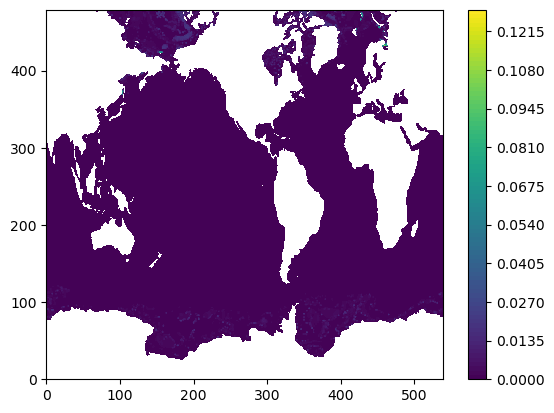

In [16]:
plt.contourf((ds.before_afsd_last[5][-1]-ds.after_afsd_last_[5][-1]),levels=100)
plt.colorbar()

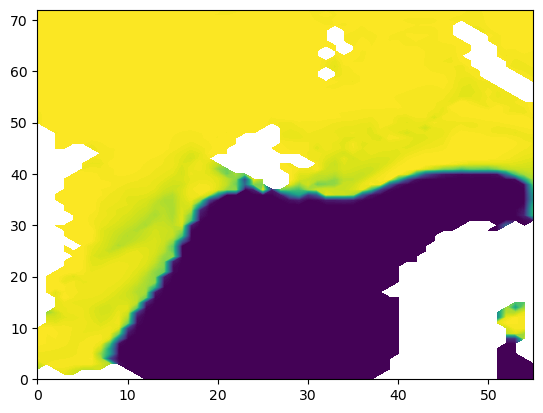

In [82]:
plt.contourf(ds.aice_h[50].isel(nj=slice(407,9999)).isel(ni=slice(394,450)),levels=100)

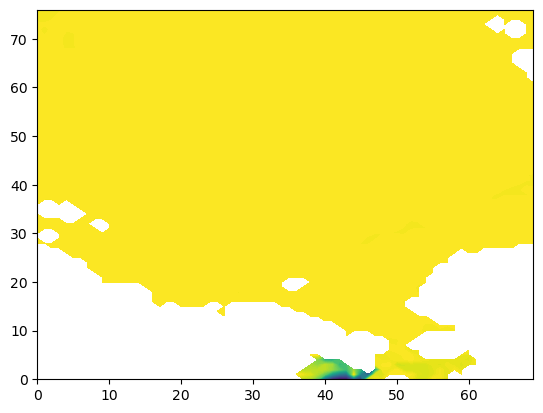

In [87]:
plt.contourf(ds.aice_h[50].isel(nj=slice(403,9999)).isel(ni=slice(120,190)),levels=100)

In [100]:
# Initialize empty lists to store the data
latBering = slice(403, 9999)
longBering = slice(120, 190)
dshigh = ds.isel(nj=latBering).isel(ni=longBering)
print(dshigh.dims['nj'])
ds_inBering = []
ds_outBering = []

# Loop over each time, nj, and ni
for t in range(len(ds.time)):  # Ignore first time step ds.dims['time']
    for j in range(dshigh.dims['nj']):
        for i in range(dshigh.dims['ni']):
            divu = dshigh.divu_h[t, j, i].values / 100
            if divu > 0.055:
                divu = 0.0549
            # Check if none of the values are NaNs

            if dshigh.aice_h[t, j, i].values > 0.1:
                if divu > 0.01:
                    # Extract the 12 (nf) values for each variable
                    before_afsd_last = dshigh.before_afsd_last[t, :, j, i].values
                    after_afsd_last_ = dshigh.after_afsd_last_[t, :, j, i].values
                    before_afsd_seco = dshigh.before_afsd_seco[t, :, j, i].values
                    after_afsd_secon = dshigh.after_afsd_secon[t, :, j, i].values
                    before_afsd_midd = dshigh.before_afsd_midd[t, :, j, i].values
                    after_afsd_middl = dshigh.after_afsd_middl[t, :, j, i].values

                    if not (np.isnan(before_afsd_last).any() or np.isnan(after_afsd_last_).any()) and not ((before_afsd_last == 0).any()):  # and before_afsd_midd[-1]>0.1
                        hold1 = after_afsd_last_ - before_afsd_last
                        ds_inBering.append((before_afsd_last, divu))
                        ds_outBering.append((hold1))

                    if not (np.isnan(before_afsd_seco).any() or np.isnan(after_afsd_secon).any()) and not ((before_afsd_seco == 0).any()):
                        hold2 = after_afsd_secon - before_afsd_seco
                        ds_inBering.append((before_afsd_seco, divu))
                        ds_outBering.append((hold2))

                    if not (np.isnan(before_afsd_midd).any() or np.isnan(after_afsd_middl).any()) and not ((before_afsd_midd == 0).any()):
                        hold3 = after_afsd_middl - before_afsd_midd
                        ds_inBering.append((before_afsd_midd, divu))
                        ds_outBering.append((hold3))

ds_inBering = np.array([np.append(arr, scalar) for arr, scalar in ds_inBering])

77


In [99]:
len(ds_inBering)

2019

In [4]:
# Initialize empty lists to store the data
latNH=slice(407,9999)
longNH=slice(394,450)
dshigh=ds.isel(nj=latNH).isel(ni=longNH)
print(dshigh.dims['nj'])
ds_in = []
ds_out = []

# Loop over each time, nj, and ni
for t in range(len(ds.time)): # Ignore first time step ds.dims['time']
    for j in range(dshigh.dims['nj']):
        for i in range(dshigh.dims['ni']):
            divu = dshigh.divu_h[t, j, i].values / 100
            if divu>0.055: divu=0.0549
            # Check if none of the values are NaNs
            
            if dshigh.aice_h[t,j,i].values>0.1:
                if divu>0.01:
                    # Extract the 12 (nf) values for each variable
                    before_afsd_last = dshigh.before_afsd_last[t, :, j, i].values
                    after_afsd_last_ = dshigh.after_afsd_last_[t, :, j, i].values
                    before_afsd_seco = dshigh.before_afsd_seco[t, :, j, i].values
                    after_afsd_secon = dshigh.after_afsd_secon[t, :, j, i].values
                    before_afsd_midd = dshigh.before_afsd_midd[t, :, j, i].values
                    after_afsd_middl = dshigh.after_afsd_middl[t, :, j, i].values

                    
                    if not (np.isnan(before_afsd_last).any() or np.isnan(after_afsd_last_).any()) and not((before_afsd_last==0).any()): # and before_afsd_midd[-1]>0.1
                        hold1=after_afsd_last_ - before_afsd_last
                        ds_in.append((before_afsd_last, divu))
                        ds_out.append((hold1))
                    
                    
                    if not (np.isnan(before_afsd_seco).any() or np.isnan(after_afsd_secon).any()) and not((before_afsd_seco==0).any()):
                        hold2=after_afsd_secon - before_afsd_seco
                        ds_in.append((before_afsd_seco, divu))
                        ds_out.append((hold2))
                    
                    
                    if not (np.isnan(before_afsd_midd).any() or np.isnan(after_afsd_middl).any()) and not((before_afsd_midd==0).any()):
                        hold3=after_afsd_middl - before_afsd_midd
                        ds_in.append((before_afsd_midd, divu))
                        ds_out.append((hold3))
            
ds_in = np.array([np.append(arr, scalar) for arr, scalar in ds_in])



73


KeyboardInterrupt: 

In [11]:
# Create CSV files for ds_in and ds_out
np.savetxt('ds_in.csv', ds_in.input, delimiter=',')
np.savetxt('ds_out.csv', ds_out.output, delimiter=',')

In [ ]:
plt.contourf(ds.aice_h[50].isel(nj=slice(407,9999)).isel(ni=slice(394,450)),levels=100)

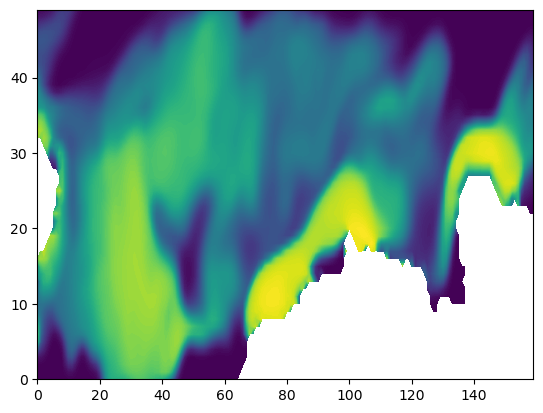

In [7]:
plt.contourf(ds.aice_h[50].isel(nj=slice(40,90)).isel(ni=slice(140,300)),levels=100)

In [54]:
#Now for southern hemisphere...
latSH=slice(40,90)
longSH=slice(140,300)
dshigh=ds.isel(nj=latSH).isel(ni=longSH)
ds_inSH = []
ds_outSH = []

# Loop over each time, nj, and ni
for t in range(len(ds.time)): # Ignore first time step ds.dims['time']
    for j in range(dshigh.dims['nj']):
        for i in range(dshigh.dims['ni']):
            divu = dshigh.divu_h[t, j, i].values / 100
            if divu>0.055: divu=0.0549
            # Check if none of the values are NaNs
            
            if dshigh.aice_h[t,j,i].values>0.1:
                if divu>0.01:
                    # Extract the 12 (nf) values for each variable
                    before_afsd_last = dshigh.before_afsd_last[t, :, j, i].values
                    after_afsd_last_ = dshigh.after_afsd_last_[t, :, j, i].values
                    before_afsd_seco = dshigh.before_afsd_seco[t, :, j, i].values
                    after_afsd_secon = dshigh.after_afsd_secon[t, :, j, i].values
                    before_afsd_midd = dshigh.before_afsd_midd[t, :, j, i].values
                    after_afsd_middl = dshigh.after_afsd_middl[t, :, j, i].values

                    
                    if not (np.isnan(before_afsd_last).any() or np.isnan(after_afsd_last_).any()) and not((before_afsd_last==0).any()): # and before_afsd_midd[-1]>0.1
                        hold1=after_afsd_last_ - before_afsd_last
                        ds_inSH.append((before_afsd_last, divu))
                        ds_outSH.append((hold1))
                    
                    
                    if not (np.isnan(before_afsd_seco).any() or np.isnan(after_afsd_secon).any()) and not((before_afsd_seco==0).any()):
                        hold2=after_afsd_secon - before_afsd_seco
                        ds_inSH.append((before_afsd_seco, divu))
                        ds_outSH.append((hold2))
                    
                    if not (np.isnan(before_afsd_midd).any() or np.isnan(after_afsd_middl).any()) and not((before_afsd_midd==0).any()):
                        hold3=after_afsd_middl - before_afsd_midd
                        ds_inSH.append((before_afsd_midd, divu))
                        ds_outSH.append((hold3))
            
ds_inSH = np.array([np.append(arr, scalar) for arr, scalar in ds_inSH])

KeyboardInterrupt: 

In [57]:
# Save ds_inSH and ds_outSH to CSV files
np.savetxt('ds_inSH.csv', ds_inSH, delimiter=',')
np.savetxt('ds_outSH.csv', ds_outSH, delimiter=',')

# Ensure ds_inSH and ds_outSH remain as numpy arrays
ds_inSH = np.array(ds_inSH)
ds_outSH = np.array(ds_outSH)

In [56]:
ds_inSH = np.array([np.append(arr, scalar) for arr, scalar in ds_inSH])

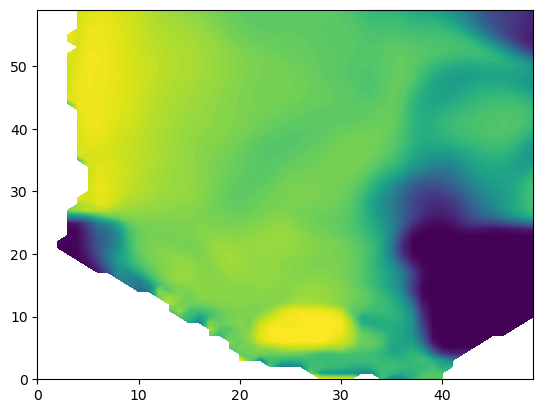

In [21]:
plt.contourf(ds.aice_h[50].isel(nj=slice(30,90)).isel(ni=slice(336,336+50)),levels=100)

In [4]:
# Now for Weddell Sea...
latWeddell = slice(30, 90)
longWeddell = slice(336,336+50)
dshigh = ds.isel(nj=latWeddell).isel(ni=longWeddell)
ds_inWeddell = []
ds_outWeddell = []

# Loop over each time, nj, and ni
for t in range(len(ds.time)):  # Ignore first time step ds.dims['time']
    for j in range(dshigh.dims['nj']):
        for i in range(dshigh.dims['ni']):
            divu = dshigh.divu_h[t, j, i].values / 100
            if divu > 0.055:
                divu = 0.0549
            # Check if none of the values are NaNs

            if dshigh.aice_h[t, j, i].values > 0.1:
                if divu > 0.01:
                    # Extract the 12 (nf) values for each variable
                    before_afsd_last = dshigh.before_afsd_last[t, :, j, i].values
                    after_afsd_last_ = dshigh.after_afsd_last_[t, :, j, i].values
                    before_afsd_seco = dshigh.before_afsd_seco[t, :, j, i].values
                    after_afsd_secon = dshigh.after_afsd_secon[t, :, j, i].values
                    before_afsd_midd = dshigh.before_afsd_midd[t, :, j, i].values
                    after_afsd_middl = dshigh.after_afsd_middl[t, :, j, i].values

                    if not (np.isnan(before_afsd_last).any() or np.isnan(after_afsd_last_).any()) and not ((before_afsd_last == 0).any()):  # and before_afsd_midd[-1]>0.1
                        hold1 = after_afsd_last_ - before_afsd_last
                        ds_inWeddell.append((before_afsd_last, divu))
                        ds_outWeddell.append((hold1))

                    if not (np.isnan(before_afsd_seco).any() or np.isnan(after_afsd_secon).any()) and not ((before_afsd_seco == 0).any()):
                        hold2 = after_afsd_secon - before_afsd_seco
                        ds_inWeddell.append((before_afsd_seco, divu))
                        ds_outWeddell.append((hold2))

                    if not (np.isnan(before_afsd_midd).any() or np.isnan(after_afsd_middl).any()) and not ((before_afsd_midd == 0).any()):
                        hold3 = after_afsd_middl - before_afsd_midd
                        ds_inWeddell.append((before_afsd_midd, divu))
                        ds_outWeddell.append((hold3))

ds_inWeddell = np.array([np.append(arr, scalar) for arr, scalar in ds_inWeddell])

In [7]:
# Save ds_inSH and ds_outSH to CSV files
np.savetxt('ds_inWeddell.csv', ds_inWeddell, delimiter=',')
np.savetxt('ds_outWeddell.csv', ds_outWeddell, delimiter=',')

# Ensure ds_inSH and ds_outSH remain as numpy arrays
ds_inWeddell = np.array(ds_inWeddell)
ds_outWeddell = np.array(ds_outWeddell)

In [5]:
len(ds_outWeddell)

15356

In [60]:
# Print the shape of ds_in
#ds_in = ds_in.input.values
#ds_out =ds_out.output.values
print(ds_in.shape,ds_outSH.shape)

(45693, 13) (44050, 12)


In [61]:
#Combine ds_inSH and ds_in and ds_outSH and ds_out
ds_in_combine=np.concatenate((ds_in,ds_inSH))
ds_out_combine=np.concatenate((ds_out,ds_outSH))
#Output shape for sanity
print(ds_in_combine.shape, ds_out_combine.shape)

(89743, 13) (89743, 12)


In [62]:
print(len(ds_out))

45693


In [63]:
# Calculate the orders of magnitude difference
def calculate_orders_of_magnitude_difference(predictions, actuals):
    differences = torch.abs(predictions - actuals)
    orders_of_magnitude_diff = torch.log10(differences + 1e-10) - torch.log10(torch.abs(actuals) + 1e-10)
    return torch.mean(torch.abs(orders_of_magnitude_diff))

In [73]:
import torch
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(ds_in_combine, ds_out_combine, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the neural network architecture
class PhysicsInformedNN(nn.Module):
    def __init__(self):
        super(PhysicsInformedNN, self).__init__()
        self.hidden1 = nn.Linear(X_train.shape[1], 100)
        self.hidden2 = nn.Linear(100, 100)
        #self.hidden3 = nn.Linear(100, 100)
        self.output = nn.Linear(100, y_train_tensor.shape[1])
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        #x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
model = PhysicsInformedNN()
criterion = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Custom loss function to enforce the sum of outputs to be zero
def custom_loss(output, target):
    mse_loss = criterion(output, target)

    sign_penalty = 0
    for i in range(output.shape[1]):
        sign_penalty += torch.mean(torch.relu(-output[:, i] * torch.sign(target[:, i])))
    sign_penalty = sign_penalty / output.shape[1]
    
    sign_loss=sign_penalty**2
    sum_constraint = torch.sum(output, dim=1)
    sum_loss = torch.mean(sum_constraint ** 2)
    return [mse_loss, sum_loss,100000*sign_loss]

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = custom_loss(outputs, y_train_tensor)
    loss_sum= loss[0]+loss[1]+loss[2] 
    loss_sum.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Hubert Loss: {loss[0].item():.6f} Sum loss: {loss[1].item():.6f} Sign Loss: {loss[2].item():.6f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = criterion(predictions, y_test_tensor)
    print(f'Test Mean Squared Error: {mse.item():.20f}')

Epoch [100/1000], Hubert Loss: 0.001372 Sum loss: 0.002692 Sign Loss: 0.001696
Epoch [200/1000], Hubert Loss: 0.001454 Sum loss: 0.000056 Sign Loss: 0.000215
Epoch [300/1000], Hubert Loss: 0.001202 Sum loss: 0.000029 Sign Loss: 0.000083
Epoch [400/1000], Hubert Loss: 0.000633 Sum loss: 0.000018 Sign Loss: 0.000082
Epoch [500/1000], Hubert Loss: 0.000134 Sum loss: 0.000021 Sign Loss: 0.000090
Epoch [600/1000], Hubert Loss: 0.000089 Sum loss: 0.000015 Sign Loss: 0.000048
Epoch [700/1000], Hubert Loss: 0.000065 Sum loss: 0.000012 Sign Loss: 0.000032
Epoch [800/1000], Hubert Loss: 0.000052 Sum loss: 0.000010 Sign Loss: 0.000021
Epoch [900/1000], Hubert Loss: 0.000045 Sum loss: 0.000007 Sign Loss: 0.000016
Epoch [1000/1000], Hubert Loss: 0.000039 Sum loss: 0.000006 Sign Loss: 0.000014
Test Mean Squared Error: 0.00003788494723266922


In [77]:
k=25000
print(model(torch.tensor(ds_in[k], dtype=torch.float32)))
print(sum(model(torch.tensor(ds_in[k], dtype=torch.float32))))
print(ds_in[k])
print(ds_out[k])

tensor([ 3.0665e-02,  9.0033e-05,  2.5855e-02,  1.1588e-03,  1.0478e-03,
         2.8681e-03, -1.0980e-03, -8.9149e-04, -6.4763e-04, -2.0292e-03,
        -1.3349e-02, -4.3604e-02], grad_fn=<ViewBackward0>)
tensor(6.5237e-05, grad_fn=<AddBackward0>)
[9.75209415e-01 2.21788120e-02 1.67558063e-03 2.78161227e-04
 2.78204447e-04 3.57938377e-04 2.18064088e-05 1.01048727e-07
 1.41995036e-11 1.92935182e-11 2.53083769e-11 2.00879868e-10
 5.49000000e-02]
[ 5.96046448e-08  4.37721610e-07  1.23283826e-06  2.85950955e-06
  5.92862489e-06  1.13468268e-05 -2.18064088e-05 -1.01048727e-07
 -1.41995036e-11 -1.92935182e-11 -2.53083769e-11 -2.00879868e-10]


In [79]:
negative_sign_differences = 0
#ds_in_combine, ds_out_combine
for i in range(len(ds_in_combine)):
    predicted_output = model(torch.tensor(ds_in_combine[i], dtype=torch.float32))
    actual_output = torch.tensor(ds_out_combine[i])
    
    # Compare the signs of the predicted and actual outputs
    predicted_signs = torch.sign(predicted_output)
    actual_signs = torch.sign(actual_output)
    
    # Count the number of different signs
    negative_sign_differences += torch.sum(predicted_signs != actual_signs).item()

print(f'Total number of different negative signs: {negative_sign_differences} As a %: {100*negative_sign_differences/(len(ds_in_combine)*len(ds_in_combine[0]))}')

Total number of different negative signs: 143504 As a %: 12.300423688498524


In [78]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    avg_orders_of_magnitude_diff = calculate_orders_of_magnitude_difference(test_predictions, y_test_tensor)
    print(f'Average Orders of Magnitude Difference: {avg_orders_of_magnitude_diff.item():.6f}')

Average Orders of Magnitude Difference: 2.100588
